# 1. Load and Inspect the Dataset
* Start by loading your dataset into Google Colab. Since the file is already uploaded, you can upload it directly from your local drive or use a cloud service.

* First, mount Google Drive to load the dataset.
Then, use pandas to inspect the dataset, check for missing values, and understand the data structure.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/creditcard.csv'
df = pd.read_csv(file_path)

print(df.info())
print(df.isnull().sum())
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64


# 2. Exploratory Data Analysis (EDA)
* Explore the distribution of fraudulent vs. non-fraudulent transactions. Fraud detection datasets tend to be highly imbalanced, so visualize the imbalance before proceeding.



Class
0    284315
1       492
Name: count, dtype: int64


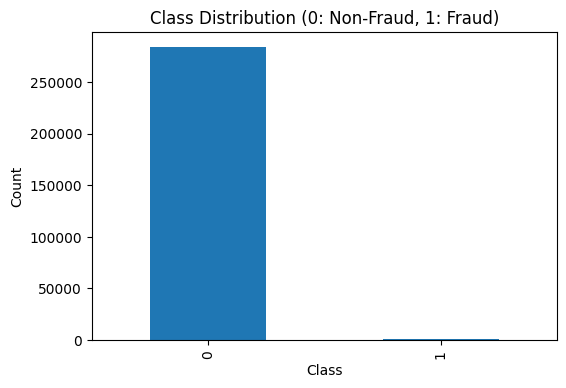

In [2]:
import matplotlib.pyplot as plt

fraud_count = df['Class'].value_counts()
print(fraud_count)

plt.figure(figsize=(6, 4))
fraud_count.plot(kind='bar')
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 3. Anomaly Detection using Isolation Forest
* Isolation Forest is an unsupervised method for detecting anomalies (fraudulent transactions). You will apply this on the dataset and visualize the results.

Number of anomalies detected:  285


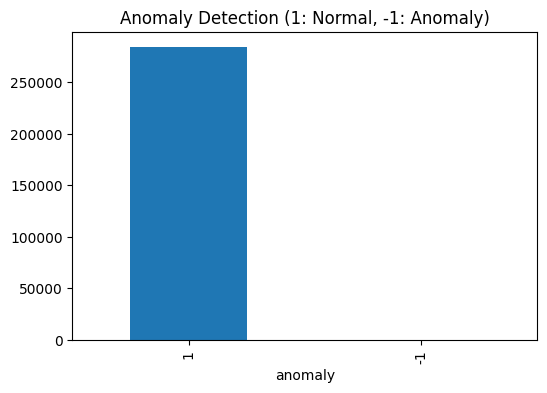

In [3]:
from sklearn.ensemble import IsolationForest

features = df.drop('Class', axis=1)
iso_forest = IsolationForest(contamination=0.001)
df['anomaly'] = iso_forest.fit_predict(features)

anomalies = df[df['anomaly'] == -1]
print("Number of anomalies detected: ", len(anomalies))

plt.figure(figsize=(6, 4))
df['anomaly'].value_counts().plot(kind='bar')
plt.title('Anomaly Detection (1: Normal, -1: Anomaly)')
plt.show()


# 4. Train a Logistic Regression Model
* You can use supervised learning to train a logistic regression model. First, split the dataset into training and test sets, then train the model and evaluate its performance.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['Class', 'anomaly'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[85293    14]
 [   48    88]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.65      0.74       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



# 5. Handle Imbalanced Data with SMOTE
* Fraud datasets are typically imbalanced, with very few fraudulent transactions compared to non-fraudulent ones. SMOTE (Synthetic Minority Over-sampling Technique) can be used to balance the dataset.

In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

lr_model_smote = LogisticRegression(max_iter=1000)
lr_model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = lr_model_smote.predict(X_test)
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_smote))
print("Classification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix (SMOTE):
 [[84466   841]
 [   10   126]]
Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.13      0.93      0.23       136

    accuracy                           0.99     85443
   macro avg       0.57      0.96      0.61     85443
weighted avg       1.00      0.99      0.99     85443



# 6. Evaluate with ROC-AUC
* Evaluate the performance of the model using the ROC-AUC score and visualize the ROC curve.

ROC-AUC: 0.9803343495016958


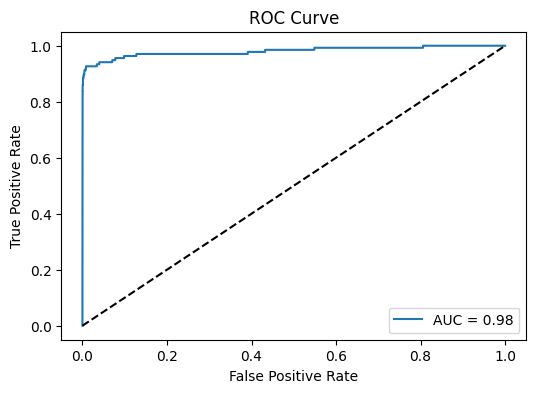

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = lr_model_smote.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 7. Feature Engineering
* Create new features such as transaction amount scaling and time-based features to enhance the model's performance.

In [7]:
df['scaled_amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
df['hour'] = (df['Time'] // 3600) % 24
print(df[['scaled_amount', 'hour']].head())


   scaled_amount  hour
0       0.244964   0.0
1      -0.342474   0.0
2       1.160684   0.0
3       0.140534   0.0
4      -0.073403   0.0
